In [1]:
#needed libraries and importing 
import pandas as pd
import altair as alt
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#reading file 
df_xlsx = pd.ExcelFile("Exercise Data Sept 2022.xlsx")

In [3]:
df_old = pd.read_excel(df_xlsx)
df_old.head()

,Ref,Name of Business,In a BID already?,Voting Intention,OCCUPIER,STREET,PROP_DESC,RV,Primary Contact,Primary Contact email,Secondary Contact,Secondary Contact email
0,1,Hotel 1,No,Yes,ABILITY HOTELS (LIVEPOOL) LTD,THOMAS STEERS WAY,Hotel & Premises,1380000,George,yes,NaN,NaN
1,2,Hotel 2,C&C,Yes,ACC LIVERPOOL HOTEL LIMITED,MONARCHS QUAY,Hotel & Premises,750000,Neil,yes,Gemma,yes
2,3,Hotel 3,C&C,Unknown,CENTRE ISLAND DEVELOPMENTS CO LTD,PRINCES DOCK (DLO),Hotel & Premises,735000,David,yes,Chris,yes
3,4,Hotel 4,No,Unknown,STANLEY DOCK HOTEL LIMITED,REGENT ROAD,Hotel & Premises,730000,Darren,yes,NaN,NaN
4,5,Hotel 5,C&C,Unknown,JURYS INN (UK) LTD,KEEL WHARF,Hotel & Premises,727000,James,yes,Hannah,yes


In [4]:
#data profiling
voting_list = df_old['Voting Intention'].unique()

voting_list_value = df_old['Voting Intention'].value_counts()
print("Types of responses : " , voting_list, "\nCount of each responses : " , voting_list_value)


Types of responses :  ['Yes' 'Unknown' 'No' 'no'] 
Count of each responses :  Unknown    52
No         18
Yes         9
no          5
Name: Voting Intention, dtype: int64


In [5]:
df_old['Voting Intention'] = df_old['Voting Intention'].map({'no':'No',
                                                            'No':'No',
                                                            'Yes':'Yes',
                                                            'Unknown':'Unknown'},na_action=None)

df_old.head()

,Ref,Name of Business,In a BID already?,Voting Intention,OCCUPIER,STREET,PROP_DESC,RV,Primary Contact,Primary Contact email,Secondary Contact,Secondary Contact email
0,1,Hotel 1,No,Yes,ABILITY HOTELS (LIVEPOOL) LTD,THOMAS STEERS WAY,Hotel & Premises,1380000,George,yes,NaN,NaN
1,2,Hotel 2,C&C,Yes,ACC LIVERPOOL HOTEL LIMITED,MONARCHS QUAY,Hotel & Premises,750000,Neil,yes,Gemma,yes
2,3,Hotel 3,C&C,Unknown,CENTRE ISLAND DEVELOPMENTS CO LTD,PRINCES DOCK (DLO),Hotel & Premises,735000,David,yes,Chris,yes
3,4,Hotel 4,No,Unknown,STANLEY DOCK HOTEL LIMITED,REGENT ROAD,Hotel & Premises,730000,Darren,yes,NaN,NaN
4,5,Hotel 5,C&C,Unknown,JURYS INN (UK) LTD,KEEL WHARF,Hotel & Premises,727000,James,yes,Hannah,yes


In [6]:
df_old['In a BID already?'] = df_old['In a BID already?'].map({'no':'No',
                                                               'No':'No',
                                                            'C&C':'C&C',
                                                            'R&L':'R&L',
                                                            },na_action=None)

In [7]:
voting_list = df_old['Voting Intention'].unique()
voting_list
voting_list_value = df_old['Voting Intention'].value_counts()
print("Types of responses : " , voting_list, "\nCount of each responses : " , voting_list_value)


Types of responses :  ['Yes' 'Unknown' 'No'] 
Count of each responses :  Unknown    52
No         23
Yes         9
Name: Voting Intention, dtype: int64


In [8]:
cat_list = df_old['In a BID already?'].unique()
cat_list_value = df_old['In a BID already?'].value_counts()
print("Types of responses : " , cat_list , "\nCount of each responses : " , cat_list_value)
df_old.head()

Types of responses :  ['No' 'C&C' 'R&L'] 
Count of each responses :  C&C    39
No     36
R&L     9
Name: In a BID already?, dtype: int64


,Ref,Name of Business,In a BID already?,Voting Intention,OCCUPIER,STREET,PROP_DESC,RV,Primary Contact,Primary Contact email,Secondary Contact,Secondary Contact email
0,1,Hotel 1,No,Yes,ABILITY HOTELS (LIVEPOOL) LTD,THOMAS STEERS WAY,Hotel & Premises,1380000,George,yes,NaN,NaN
1,2,Hotel 2,C&C,Yes,ACC LIVERPOOL HOTEL LIMITED,MONARCHS QUAY,Hotel & Premises,750000,Neil,yes,Gemma,yes
2,3,Hotel 3,C&C,Unknown,CENTRE ISLAND DEVELOPMENTS CO LTD,PRINCES DOCK (DLO),Hotel & Premises,735000,David,yes,Chris,yes
3,4,Hotel 4,No,Unknown,STANLEY DOCK HOTEL LIMITED,REGENT ROAD,Hotel & Premises,730000,Darren,yes,NaN,NaN
4,5,Hotel 5,C&C,Unknown,JURYS INN (UK) LTD,KEEL WHARF,Hotel & Premises,727000,James,yes,Hannah,yes


In [9]:
voting_list_value


Unknown    52
No         23
Yes         9
Name: Voting Intention, dtype: int64

In [10]:
#renaming column for better usage
df_old = df_old.rename(columns = {'Voting Intention':'Voting_Intention'})

In [11]:
#data visualization one
chart1 = pd.DataFrame({"category":voting_list_value.index , "value": voting_list_value})

alt.Chart(chart1).mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="value", type="quantitative"),
    color=alt.Color(field="category", type="nominal"),
)

alt.Chart(...)

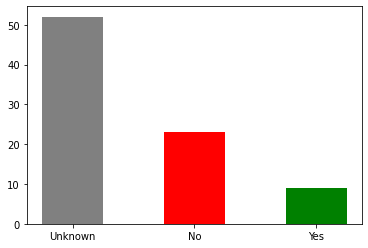

In [12]:
#data visualization two
x = df_old.Voting_Intention.value_counts()
bp = plt.bar(x.index, x, width = 0.5, bottom = None, color = ('grey','red', 'green'))


plt.show()

<AxesSubplot:xlabel='Voting_Intention', ylabel='Count'>

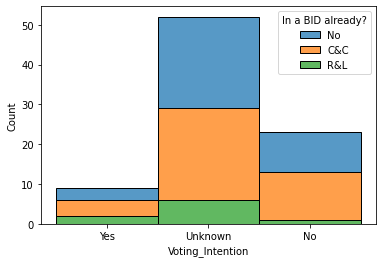

In [13]:
#data visualization three
sns.histplot(binwidth=0.5, x="Voting_Intention", hue="In a BID already?", data=df_old, stat="count", multiple="stack")

In [14]:
#statistics
total_rv = df_old['RV'].sum()
total_rv

22014250

In [15]:
#new df for other visualisations 
df_rv = df_old.filter(['RV','In a BID already?'], axis = 1)
df_rv.head()


,RV,In a BID already?
0,1380000,No
1,750000,C&C
2,735000,C&C
3,730000,No
4,727000,C&C


In [16]:
df_rv['Step1'] = df_rv['RV']*0.016
df_rv['step2'] = df_rv['RV']*0.045
df_rv['step3'] = df_rv['RV']*0.055
df_rv['Total_Charged'] = df_rv['Step1'] + df_rv['step2'] + df_rv['step2'] + df_rv['step3'] + df_rv['step3']
df_rv.head()

,RV,In a BID already?,Step1,step2,step3,Total_Charged
0,1380000,No,22080.0,62100.0,75900.0,298080.0
1,750000,C&C,12000.0,33750.0,41250.0,162000.0
2,735000,C&C,11760.0,33075.0,40425.0,158760.0
3,730000,No,11680.0,32850.0,40150.0,157680.0
4,727000,C&C,11632.0,32715.0,39985.0,157032.0


In [17]:
df_rv['year1'] = df_rv['Step1']
df_rv['year2'] = df_rv['step2']
df_rv['year3'] = df_rv['step2']
df_rv['year4'] = df_rv['step3']
df_rv['year5'] = df_rv['step3']
df_rv.head()

,RV,In a BID already?,Step1,step2,step3,Total_Charged,year1,year2,year3,year4,year5
0,1380000,No,22080.0,62100.0,75900.0,298080.0,22080.0,62100.0,62100.0,75900.0,75900.0
1,750000,C&C,12000.0,33750.0,41250.0,162000.0,12000.0,33750.0,33750.0,41250.0,41250.0
2,735000,C&C,11760.0,33075.0,40425.0,158760.0,11760.0,33075.0,33075.0,40425.0,40425.0
3,730000,No,11680.0,32850.0,40150.0,157680.0,11680.0,32850.0,32850.0,40150.0,40150.0
4,727000,C&C,11632.0,32715.0,39985.0,157032.0,11632.0,32715.0,32715.0,39985.0,39985.0


In [19]:
#saving df as a excel file 
rv_analysis_data3 = pd.ExcelWriter('rv_analysis_data3.xlsx')
df_rv.to_excel(rv_analysis_data3)
rv_analysis_data3.save()

In [ ]:
#new columns 

In [20]:
year1 = df_rv.loc[(df_rv['In a BID already?'] == 'C&C') | (df_rv['In a BID already?'] == 'R&L'), 'Step1'].sum()

In [21]:
year2 = df_rv.loc[(df_rv['In a BID already?'] == 'C&C') | (df_rv['In a BID already?'] == 'R&L'), 'step2'].sum() 
year3 = year2

In [22]:
year4 = df_rv.loc[(df_rv['In a BID already?'] == 'C&C') | (df_rv['In a BID already?'] == 'R&L'), 'step3'].sum()

In [23]:
year5 = year4

In [24]:
#data visualisation four
source = pd.DataFrame({
    'Year': ['Year1', 'Year2', 'Year3', 'Year4', 'Year5'],
    'Accure Chargers': [year1, year2, year3, year4, year5]})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Accure Chargers'
)

alt.Chart(...)

In [25]:
#Total chargers accumulated in 5 years
Total = year1 + year2 + year3 + year4 + year5
Total

2896992.0

In [26]:
# payers not in the BID 

In [27]:
year1_no = df_rv.loc[df_rv['In a BID already?'] == 'No', 'Step1'].sum()
year2_no = df_rv.loc[df_rv['In a BID already?'] == 'No', 'step2'].sum()
year3_no = year2_no
year4_no = df_rv.loc[df_rv['In a BID already?'] == 'No', 'step3'].sum()
year5_no = year4_no

In [28]:
#data visualisation five 
source = pd.DataFrame({
    'Year': ['Year1', 'Year2', 'Year3', 'Year4', 'Year5'],
    'Accure Chargers': [year1_no, year2_no, year3_no, year4_no, year5_no]})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Accure Chargers'
)

alt.Chart(...)

In [29]:
##Total chargers accumulated in 5 years of non bid payers 
Total_no = year1_no + year2_no + year3_no + year4_no + year5_no
Total_no

1858086.0